In [1]:
import numpy as np
from astropy import units as u

# 作业13

#### 1.假设一颗大质量的恒星为40,000 K的O型星，其热光度为太阳的10万倍，假设周围是中性星际气体（全部为氢原子，n~10cm-3）均匀分布，其在10000年内能电离的球形空间的半径为多大？

In [2]:
from astropy import units as u
from astropy.constants import b_wien, h, c
T = 40000 * u.K
lambda_max = b_wien / T
print(f"峰值波长为{lambda_max.to(u.angstrom):.2f}")
E = h * c / lambda_max
print(f"峰值波长的光子能量为{E.to(u.eV):.2f} > 13.6 eV")


峰值波长为724.44 Angstrom
峰值波长的光子能量为17.11 eV > 13.6 eV


因为完全均匀球形空间，完全电离，问题等价于看电离平衡的大小和光子在10000年走过的距离谁更大，如果达到电离平衡则内部光子无法继续逃逸（因为光学厚）。先估算斯特龙根半径（HII区）的大小$r_\text{S0}=9.77\times 10^{18}Q_{0,49}^{1/3}n_2^{-2/3}T_4^{0.28}\text{cm} $，此时所有的高能光子都被HII氢吸收，达到电离平衡

其中,$Q_{0,49}=Q_0/10^{49}s^{-1},n_2=n_H/10^2cm^{-3}$, 所以只需要计算发射能量大于13.6eV光子的速率$Q_0$

$\braket{h\nu}_i=L_i/Q_0$

In [3]:
from astropy.constants import L_sun

d = 1e4 * u.lyr
d = d.to(u.pc)

L_bol = 1e5 * L_sun
n = 10 * u.cm**-3
t = 1e4 * u.yr
Q_0 = L_bol / E
Q_0 = Q_0.to(u.s**-1)
Q_049 = Q_0 / (1e49 * u.s**-1)
n_2 = n / (1e2 * u.cm**-3)
r_s0 = 9.77e18 * Q_049**(1/3) * n_2**(-2/3) * (T / (10**4 * u.K))**0.28 * u.cm
print(f"斯特龙根半径为{r_s0.to(u.pc):.2f} < 10000光年长度{d:.2f}")

print(f"因此，10000年后，光子无法逃逸，达到电离平衡，HII区半径为{r_s0.to(u.pc):.2f}")


斯特龙根半径为24.22 pc < 10000光年长度3066.01 pc
因此，10000年后，光子无法逃逸，达到电离平衡，HII区半径为24.22 pc


# 只需要计算产生了多少>13.6ev的光子

#### 2.请对银河系中的各种物质成分的质量比进行估算

查得以下各类物质的质量大约为：
暗物质：1.9e12
恒星质量：薄盘6e10, 厚盘3e9, 核球1e10
银河系内星际介质：ISM和恒星质量大约1：1, 大约就是6e10+3e9
中央黑洞：3.7e6
尘埃：0.01*(6e10+3e9)
恒星遗迹：0.1(6e10+3e9+1e10)

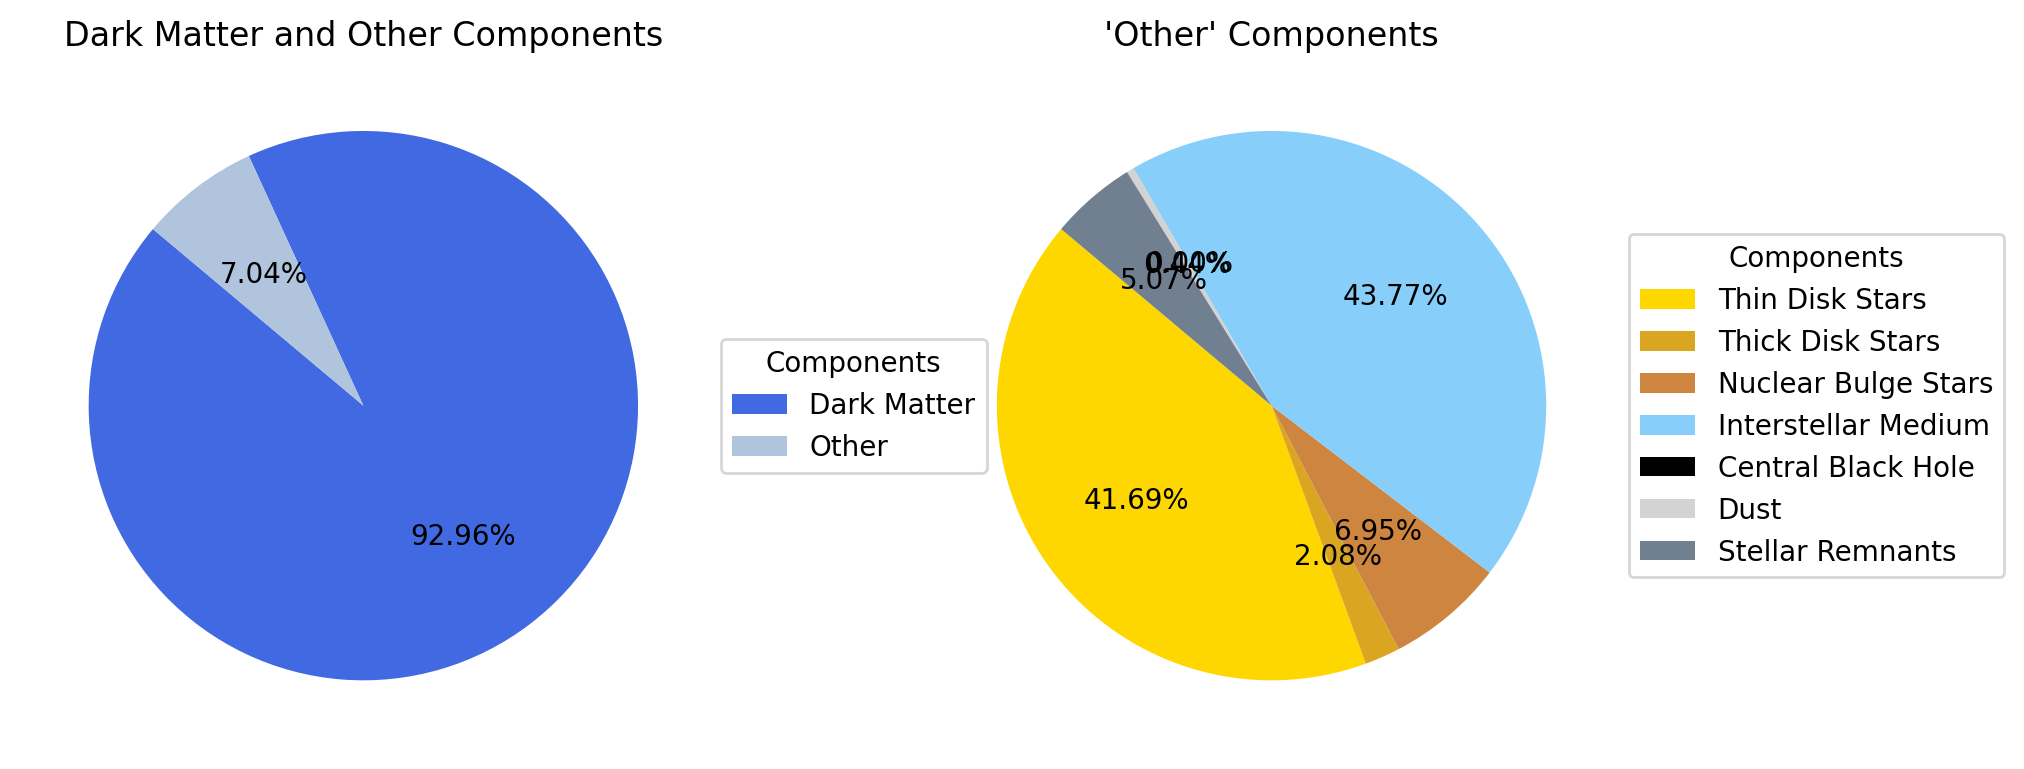

In [4]:
import matplotlib.pyplot as plt
large_labels = ['Dark Matter', 'Other']
large_sizes = [
    1.9e12,
    6e10 + 3e9 + 1e10 + (6e10 + 3e9) + 3.7e6 + 0.01 * (6e10 + 3e9) + 0.1 * (6e10 + 3e9 + 1e10)
]
large_colors = ['#4169E1', '#B0C4DE']
small_labels = [
    'Thin Disk Stars', 'Thick Disk Stars', 'Nuclear Bulge Stars',
    'Interstellar Medium', 'Central Black Hole', 'Dust', 'Stellar Remnants'
]
small_sizes = [
    6e10, 3e9, 1e10, 
    6e10 + 3e9, 3.7e6, 
    0.01 * (6e10 + 3e9), 
    0.1 * (6e10 + 3e9 + 1e10)
]
small_colors = ['#FFD700', '#DAA520', '#CD853F', '#87CEFA', '#000000', '#D3D3D3', '#708090']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=200)
wedges1, texts1, autotexts1 = ax1.pie(
    large_sizes,
    labels=None,
    autopct='%.2f%%',
    startangle=140,
    colors=large_colors
)
ax1.set_title("Dark Matter and Other Components")
ax1.legend(wedges1, large_labels, title="Components", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
wedges2, texts2, autotexts2 = ax2.pie(
    small_sizes,
    labels=None,
    autopct='%.2f%%',
    startangle=140,
    colors=small_colors
)
ax2.set_title("'Other' Components")
ax2.legend(wedges2, small_labels, title="Components", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


# 作业14

#### 1.下载一个LAMOST或者SDSS观测到的星系光谱文件，画出相应光谱，测量至少一个Lick指数特征及其误差，并在图中标注

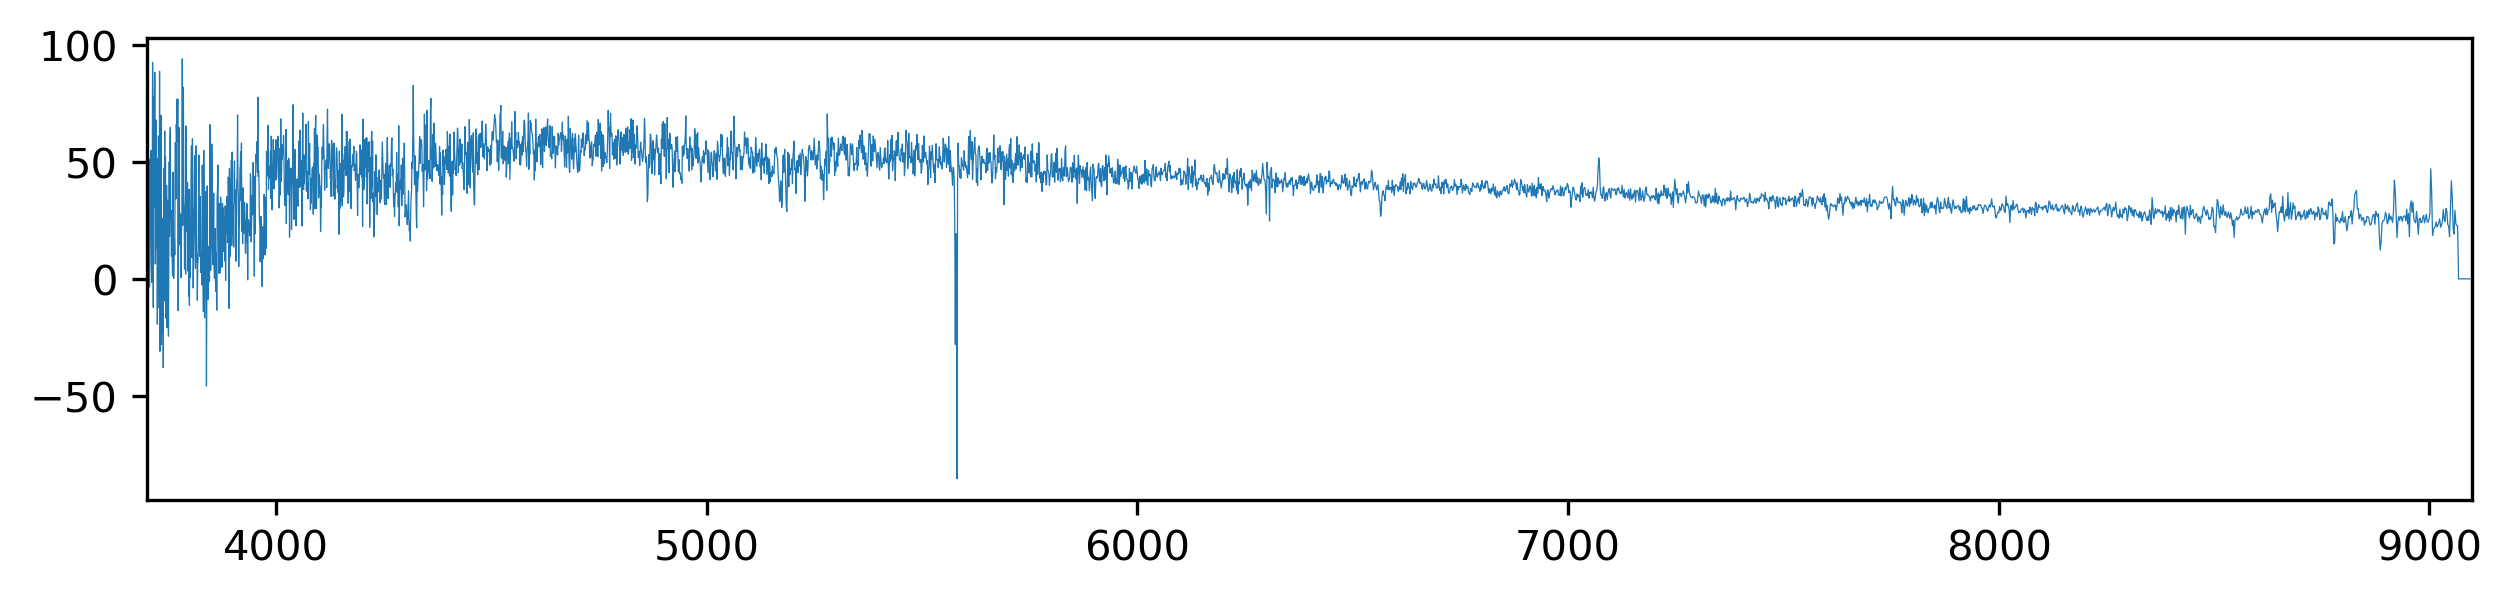

In [5]:
from astropy.io import fits
import sys
import os
sys.path.append("/data/public/renhaoye/ai4galmorph/homework")
from lick import Lick

specf = "/data/public/renhaoye/ai4galmorph/homework/spec-57100-HD124632N240842M01_sp10-224.fits"
spec = fits.open(specf)[1].data
wavelength = spec["WAVELENGTH"][0]
flux = spec["FLUX"][0]

plt.figure(figsize=(10, 2), dpi=300)
plt.plot(wavelength, flux, linewidth=0.3)
plt.xlim(np.min(wavelength), np.max(wavelength))
plt.show()

### 可视化太多不太好区分，间隔地挑了几个可视化出来

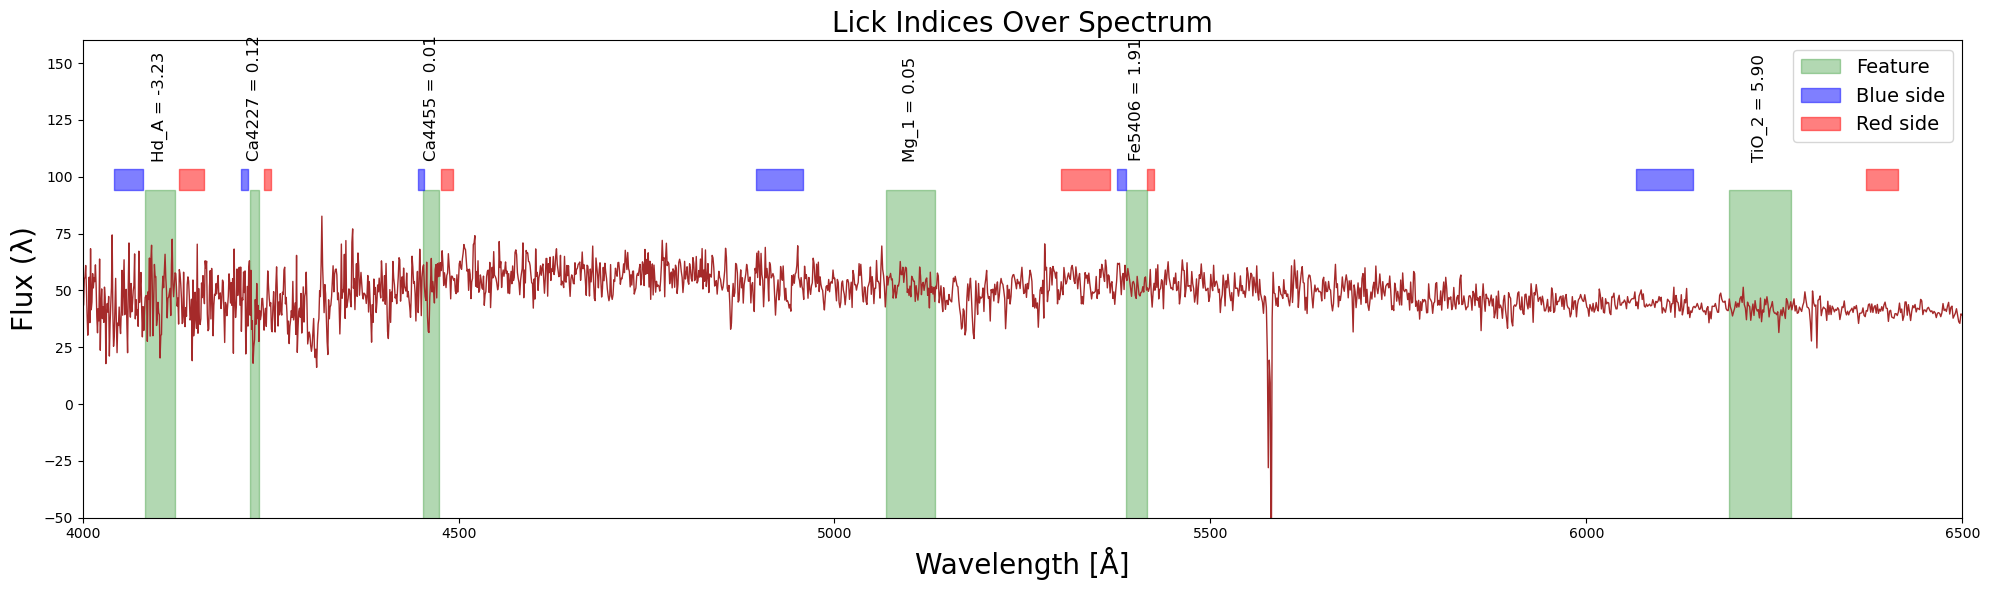

In [6]:
bands_file = "bands.txt"
bands_data = np.loadtxt(bands_file, dtype={'names': ('name', 'sigma', 'blue_start', 'blue_end', 'feature_start', 'feature_end', 'red_start', 'red_end', 'type', 'units', 'error'),
                                           'formats': ('U10', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'i4', 'U4', 'f4')})

# 初始化 Lick 对象并计算 Lick 指数
lick = Lick(wavelength, flux, np.column_stack((bands_data['blue_start'], bands_data['blue_end'],
                                               bands_data['feature_start'], bands_data['feature_end'],
                                               bands_data['red_start'], bands_data['red_end'])))
lick.classic_integration()
computed_indices = lick.classic

# 绘制光谱
plt.figure(figsize=(20, 6), dpi=100)
plt.plot(wavelength, flux, color='brown', linewidth=1)
plt.xlabel('Wavelength [Å]', fontsize=20)
plt.ylabel('Flux (λ)', fontsize=20)
plt.title("Lick Indices Over Spectrum", fontsize=20)
plt.xlim(np.min(wavelength), np.max(wavelength))

# 设置红端和蓝端带宽的基础y位置，以便在光谱上方显示为短条
base_y_min, base_y_max = np.max(flux) * 1., np.max(flux) * 1.1

# 在光谱上绘制各个 Lick 指数的带宽区间
for i, band in enumerate(bands_data[np.linspace(0, len(bands_data)-1, 6).astype(int)]):
    # 特征波段
    plt.fill_betweenx([np.min(flux), np.max(flux)],
                      band['feature_start'], band['feature_end'], color='green', alpha=0.3, label="Feature" if i == 0 else "")
    
    # 蓝端带宽（小范围，位于光谱上方）
    plt.fill_betweenx([base_y_min, base_y_max],
                      band['blue_start'], band['blue_end'], color='blue', alpha=0.5, label="Blue side" if i == 0 else "")
    
    # 红端带宽（小范围，位于光谱上方）
    plt.fill_betweenx([base_y_min, base_y_max],
                      band['red_start'], band['red_end'], color='red', alpha=0.5, label="Red side" if i == 0 else "")
    
    # 标注 Lick 指数名称及其数值，放在特征波段中心上方，并上下错位
    label_y_position = base_y_max + 5  # 标签位置稍微高于红端和蓝端
    plt.text((band['feature_start'] + band['feature_end']) / 2, label_y_position,
             f"{band['name']} = {computed_indices[i]:.2f}", ha='center', fontsize=12, rotation=90)
plt.legend(loc='upper right', fontsize=14)
plt.ylim(-50,160)
plt.xlim(4000, 6500)
plt.tight_layout()
plt.show()

#### 2.SDSS的光谱分辨率是~2000，某星系其连续谱单位波长的典型信噪比为5，该星系Ha线的等值宽度为50A，请问其Ha线流量的信噪比是多少？

根据分辨率=$\frac{\lambda}{\Delta\lambda} = 2000$，可知单位波长$\Delta\lambda = 6563/2000=3.28\r{A}$

Ha的像素数$N = \frac{\text{EW}}{\Delta\lambda} = 50/3.28=15.24~\text{pixel}$

根据单位波长的信噪比：$SNR_{\Delta\lambda}=\frac{S_\text{连续谱}}{\sigma_{\Delta\lambda}} = 5$，可知$\sigma_{\Delta\lambda} = \frac{S_\text{连续谱}}{SNR_{\Delta\lambda}}$

根据EW的定义得：$F_{H_\alpha} = S_\text{连续谱}\times\text{EW}$

信噪比随像素数量按根号变化：$\sigma_{H_\alpha} = \sigma_{\Delta\lambda}\times\sqrt{N}\times\Delta\lambda = \dfrac{S_\text{连续谱}}{SNR_{\Delta\lambda}}\times\sqrt{N}\times\Delta\lambda$

Ha的信噪比$SNR_{H_\alpha} = \dfrac{F_{H_\alpha}}{\sigma_{H_\alpha}} = \dfrac{S_\text{连续谱}\times EW}{\frac{S_\text{连续谱}}{SNR_{\Delta\lambda}}\times\sqrt{N}\times\Delta\lambda} = \frac{5\times 50}{\sqrt{15.24}\times 3.28}\approx19.5$
